# Business Analytics Model - Module 4 Assignment

**Author:** Okpanku Ijeoma  
**Dataset:** Smart_logistics_dataset.csv  
**Objective:** Optimizing Supply Chain Operations with focus to develop a model to analyze targeted variable using the cleaned data


## Step 1: Import Required Libraries  
We start by importing all the necessary Python libraries for data manipulation, visualization, and machine learning.

In [17]:
# Import Libraries
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Step 2: Load Dataset

In [18]:
# Load your dataset (replace with your actual file path)
df = pd.read_csv(r"c:\users\user\Downloads\SUPPLY_CHAIN_OPTIMIZIATION\cleaned_data.csv")

# Quick look at the data
print(df.head())
print(df.info())
print(df.describe())

             Timestamp  Asset_ID  Latitude  Longitude  Inventory_Level  \
0  2024-03-20 00:11:00   Truck_7  -65.7383    11.2497              390   
1  2024-10-30 07:53:00   Truck_6   22.2748  -131.7086              491   
2  2024-07-29 18:42:00  Truck_10   54.9232    79.5455              190   
3  2024-10-28 00:50:00   Truck_9   42.3900    -1.4788              330   
4  2024-09-27 15:52:00   Truck_7  -65.8477    47.9468              480   

  Shipment_Status  Temperature  Humidity Traffic_Status  Waiting_Time  \
0         Delayed         27.0      67.8         Detour            38   
1      In Transit         22.5      54.3          Heavy            16   
2      In Transit         25.2      62.2         Detour            34   
3       Delivered         25.4      52.3          Heavy            37   
4         Delayed         20.5      57.2          Clear            56   

   User_Transaction_Amount  User_Purchase_Frequency Logistics_Delay_Reason  \
0                      320            

## Step 3: Exploratory Data Analysis (EDA)

C:\Users\User\AppData\Local\Temp\ipykernel_18792\2888120567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Logistics_Delay', data=df, palette='Set2')


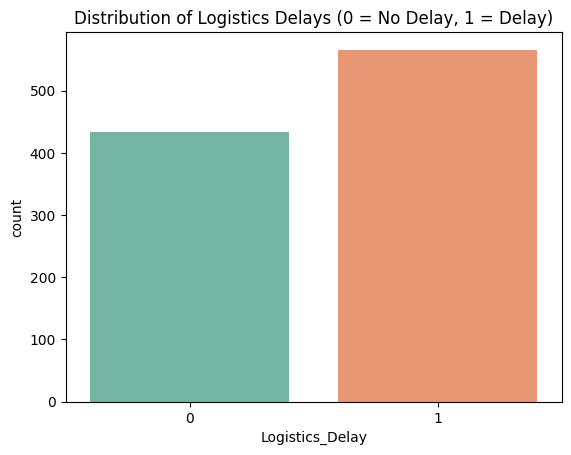

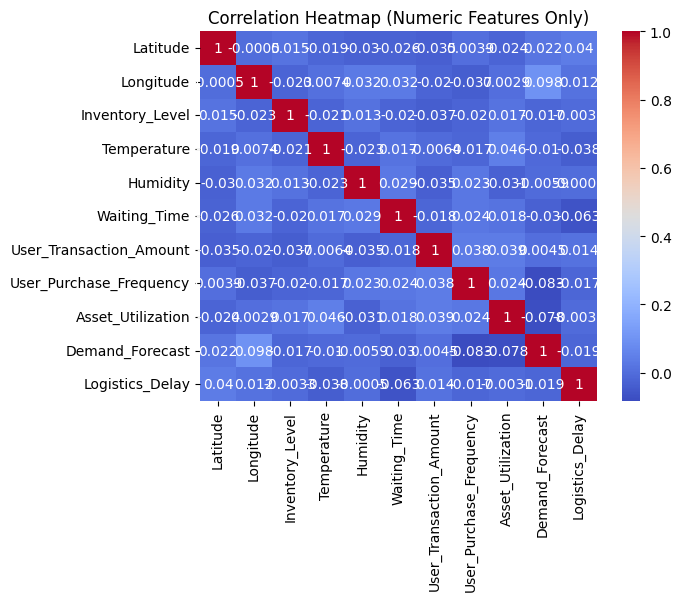

In [19]:
# Example visualizations

# Count plot of target variable
sns.countplot(x='Logistics_Delay', data=df, palette='Set2')
plt.title("Distribution of Logistics Delays (0 = No Delay, 1 = Delay)")
plt.show()

# Heatmap of correlations
# Restrict Correlation only on numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

## Step 4: Feature Engineering & Preprocessing

In [20]:
# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Convert Timestamp to datetime and extract numeric features
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    df['Year'] = df['Timestamp'].dt.year
    df['Month'] = df['Timestamp'].dt.month
    df['Day'] = df['Timestamp'].dt.day
    df['Weekday'] = df['Timestamp'].dt.weekday
    df = df.drop(columns=['Timestamp'])

# List of categorical columns to encode
categorical_cols = ['Asset_ID', 'Shipment_Status', 'Traffic_Status', 'Logistics_Delay_Reason']

# Keep only those that exist in the DataFrame
categorical_cols = [col for col in categorical_cols if col in df.columns]

# One-hot encode categorical variables safely
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target
if 'Logistics_Delay' in df.columns:
    X = df.drop('Logistics_Delay', axis=1)  # Features
    y = df['Logistics_Delay']               # Target

else:
    raise KeyError("Target column 'Logistics_Delay' not found in DataFrame.")

# Quick check
print("Feature columns:", X.columns.tolist())
print("Target column:", y.name)



Feature columns: ['Latitude', 'Longitude', 'Inventory_Level', 'Temperature', 'Humidity', 'Waiting_Time', 'User_Transaction_Amount', 'User_Purchase_Frequency', 'Asset_Utilization', 'Demand_Forecast', 'Year', 'Month', 'Day', 'Weekday', 'Asset_ID_Truck_10', 'Asset_ID_Truck_2', 'Asset_ID_Truck_3', 'Asset_ID_Truck_4', 'Asset_ID_Truck_5', 'Asset_ID_Truck_6', 'Asset_ID_Truck_7', 'Asset_ID_Truck_8', 'Asset_ID_Truck_9', 'Shipment_Status_Delivered', 'Shipment_Status_In Transit', 'Traffic_Status_Detour', 'Traffic_Status_Heavy', 'Logistics_Delay_Reason_Traffic', 'Logistics_Delay_Reason_Weather']
Target column: Logistics_Delay


## Step 5: Model Development

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Initialize  and train Random Forest Model
model = RandomForestClassifier(random_state=42)

#Train the model
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Step 6: EVALUATION OF MODEL PERFORMANCE

In [22]:
# Predict on test data
y_pred = model.predict(X_test)

print("Model training completed and predictions made.")



Model training completed and predictions made.


In [23]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.4f}")

Accuracy of the model: 1.0000


In [24]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[ 91   0]
 [  0 109]]


In [25]:
# Classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       109

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# Additional Evaluation Report

In [26]:
# Cross Validation to check robustness of models performance
## Explanation:
# being that the initial trainset, the training was done on 80% of the data and tested on 20% 
# withthe accuracy of 100% which is said to be too good to be true,not aa very real world scenerio, decided to probe further by doing a cross validation test to test the robustness of the model
# Cross valdation helps to address this by splitting the dataset into multple folds, specifically 5 folds
# Train the model on 4 folds and test the 1 fold
# Average the accuracy accross all folds to get a realiable performance estimate

# If the cross-validation accuracy is close to the test accuracy, it shows the model is **generalizable and stable**
# If the cross-validation accuracy drops significantly, it suggests the model may be **overfitting** to certain parts of the data

In [27]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation to check robustness
cv_scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")

print("Cross-validation scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)")
print(f"Standard Deviation: {cv_scores.std():.4f} ({cv_scores.std()*100:.2f}%)")

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0000 (100.00%)
Standard Deviation: 0.0000 (0.00%)


### Cross Validation Report
# The cross-validation returned 100% accuracy across all folds, with a standard deviation of 0. This suggests the model is perfectly classifying all samples in the dataset.
# Result looks impressive, but not real,see below implication
# There may be potential leakage, where information about the target variable is indirectly present in the feature.
# Where features may be higly correlated with the target variable.
# Therefrfore a further validation test wil be required such as **Stratified K-Fold Cross-Validation** or a **Train/Validation/Test split** can be applied. 




## Feature Importance Analysis
# This will show which feature or column most affects the models prediction
# It will give the stakeholder insights as to what drives the outcome.


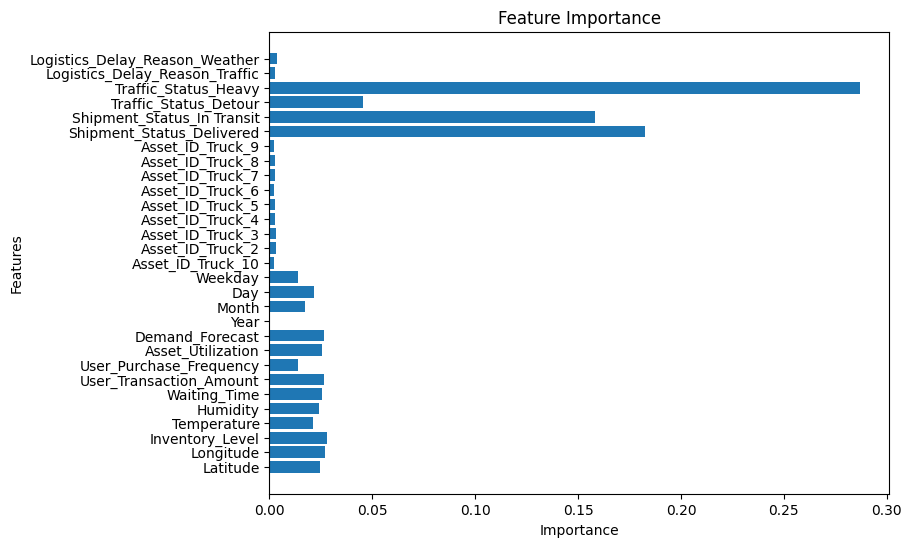

In [28]:
import matplotlib.pyplot as plt

# Feature Importance
feature_importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(8,6))
plt.barh(features, feature_importances)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

### Feature Importance Analyisis Report

- "Traffic_Status_Heavy" is seen to be the most important factor strongly influencing shipment delays.  
- "Shipment_Status_Delivered" and "Shipment_Status_In Transit" are also highly influential, they show that shipment tracking status impacts prediction accuracy.  
-  Reasonable level contributions came from "Traffic_Status_Detour", "Inventory_Level", "Waiting_Time", and "User_Transaction_Amount".  
-  Minimal significance was assigned to "individual truck IDs" and "logistics delay reasons" (Weather, Traffic).  

# Insight: In a nutshell, operational factors such as Traffic siutations and Shipment status are more critical variables than Vehicle variables therefore stakehodesr should pay attention to traffic management and shipment activities in other to reduce delays and optimze over all supply chain operations.


# Workflow Summary

This notebook contains the process of preparing, modelling and evaluating business anaytics dataset.see below the step by step workflow process:


## Step 1: Import Libraries

## Step 2: Load cleaned dataset

## Step 3: Exploratory Data Analysis EDA
- Visualised distribution of targeted variables, logistics_delay variable using a chart
- Anaysed correlation between features using the correlation matrix

## Step 4: Feature Prerocessing and Engeneering
- Performed some cleaning exercise of column names by emoving spaces
- Converted Timestamp variablee to determine and extract numerc features
- Columns not requred were dropped
- encoded categorical variables
- Defined feature and target.

## Step 5: Model Development using the Randomforest
- Split dataset into training & test set
- Initialized the trained Randomforest
- Train Randomforest model

## Model Evaluation
- Prediction was generated
- Accuracy evaluation was done
- Confusiom metrix 
- Classification report gotten




Step 6: Additional Evaluation

AS a result of initial 100% accuracy result gotten which was deos not connote a real world scenerio , futher probe was carried out.
Cross Validation:
.   Cross Validation was done to determine the robutness of the model perfomance
.   5 fold cros validation was performed
.   A consistent result was gotten returning 100% accuracy accross all the folds with 0% variance.
.   Consitent result gotten, confirmed stability but no generalization. 
.   Further validation is recommeded (e.g., stratified k-fold, train /validation/test split) confirm generalization.  

Feature Importance Analysis:
.   Identified "Traffic_Status_Heavy", "Shipment_Status_Delivered", and "Shipment_Status_In Transit" as the most influential features.  
.   Moderate contributions were observed to be "Traffic_Status_Detour", "Inventory_Level", "Waiting_Time", and "User_Transaction_Amount".  
.   Minimal influence came from individual truck IDs and less critical delay reasons.  
-   Insight: Operational conditions being traffic and shipment status are more important drivers of delays than vehicle  variables identifiers.  

Conclussion:
The model demonstrated a high predictive capacity, stability, and interpretable insights but  due to the perfect scenerio achieved which was not practical ie. a return of 100% accuracy upon using the Cross validation and feature impotance Analysis, further probe was recommended being the stratified k-fold, train/validation/test split. Howevere, it was confirmed that certain variables were identified to be influencing factors responsible for delay, and they are Traffic Shipment variables. This will give stakeholders insights to focus on Traffic management and Shipment monitoring in other to minimize delays and achieve Supply Chain Optimization.  


 